# **Sentiment Analysis (Hospital Data)**

## **1) Problem Statement :**

#### The Sentiment Analysis of Healthcare project aims to develop a classification model that accurately categorizes hospital reviews into positive and negative sentiments.This model will provide healthcare valuable insights into patient satisfaction and identify areas for improvement across hospitals and healthcare facilities.

## import the libraries

In [11]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake

from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score

# 2) Data :
- We have data in csv format

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = pd.read_csv("/content/dataset_es_train.csv")
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
186907,es_0108624,product_es_0338343,reviewer_es_0576463,5,Relación calidad- precio excelente. La única q...,Excepcional,es,wireless
186908,es_0516359,product_es_0830705,reviewer_es_0320435,5,El producto llego hace un par de dias.Una exce...,producto recomendado,es,apparel
186909,es_0092406,product_es_0185405,reviewer_es_0413231,5,Venían 3 imanes y otros 3 para ponerlos en el ...,Soporte móvil,es,wireless
186910,es_0442576,product_es_0686673,reviewer_es_0602649,5,Relación calidad precio bien,Recomiendo,es,home_improvement


In [19]:
data.shape

(186912, 8)

#### Take random 1000 records

In [20]:
sample = data.sample(1000)
sample.reset_index(drop = True, inplace=True)

In [21]:
sample.shape

(1000, 8)

### We need only review_body (independent feature) and stars (dependent feature)

In [22]:
df = sample[["review_body",'stars']]
df.head()

,review_body,stars
0,Está muy bien para entretener y relajarse un poco,4
1,"Es un aislador de bíceps malísimo, no ajusta l...",1
2,Es un poco bajita y la malla es difícil de col...,4
3,Llegó con signos de estar abierto aunque apare...,2
4,Venían dos dados repetidos así no se puede jugar,1


### perform the initial data preprocessing :
- 1) language detection
- 2) language translation

### 1) language detect

In [23]:
def lang_detect(data):
  lang = detect(data)
  return lang


In [25]:
lang_detect(df['review_body'][0])

'es'

In [27]:
df['language'] = df['review_body'].apply(lang_detect)

In [28]:
df.head()

,review_body,stars,language
0,Está muy bien para entretener y relajarse un poco,4,es
1,"Es un aislador de bíceps malísimo, no ajusta l...",1,es
2,Es un poco bajita y la malla es difícil de col...,4,es
3,Llegó con signos de estar abierto aunque apare...,2,es
4,Venían dos dados repetidos así no se puede jugar,1,es


In [33]:
df['language'].value_counts()

es    984
pt     10
en      3
ca      1
it      1
so      1
Name: language, dtype: int64

### language translate (English)

In [31]:
def lang_trans(data):
  translor = Translator()
  trans = translor.translate(data)
  return trans.text

In [32]:
lang_trans(df['review_body'][0])

'It is very good to entertain and relax a little'

In [34]:
df['translated_lang'] = df['review_body'].apply(lang_trans)

In [37]:
df.head()

,review_body,stars,language,translated_lang
0,Está muy bien para entretener y relajarse un poco,4,es,It is very good to entertain and relax a little
1,"Es un aislador de bíceps malísimo, no ajusta l...",1,es,"It's a lousy bicep isolator, it doesn't adjust..."
2,Es un poco bajita y la malla es difícil de col...,4,es,It is a bit short and the mesh is difficult to...
3,Llegó con signos de estar abierto aunque apare...,2,es,It arrived with signs of being open although a...
4,Venían dos dados repetidos así no se puede jugar,1,es,Two repeated dice came so you can't play


# **3) Exploratory Data Analysis**

For Exploratory Data Analysis we perforn 3 methode which help us to get insights from data.
- 1) N-gram -- > Unigram, Bigram and Trigram
- 2) Word Cloud
- 3) Keyphrase Extraction : YAKE and RAKE

### **N-gram**

In [35]:
def ngram_extraction(data,ngram_range):
  token = word_tokenize(data)
  ngram = ngrams(token,ngram_range)         # zip file
  ngram_list = []
  for ngram1 in ngram:
    ngram_list.append(" ".join(ngram1))
  return ngram_list




In [39]:
list_unigrams = df.translated_lang.apply(lambda x :ngram_extraction(x,1))

In [40]:
list_unigrams

0      [It, is, very, good, to, entertain, and, relax...
1      [It, 's, a, lousy, bicep, isolator, ,, it, doe...
2      [It, is, a, bit, short, and, the, mesh, is, di...
3      [It, arrived, with, signs, of, being, open, al...
4      [Two, repeated, dice, came, so, you, ca, n't, ...
                             ...                        
995    [It, does, not, read, half, of, the, vehicles,...
996    [Flies, do, n't, even, come, by, chance, ., It...
997    [I, have, had, other, brands, that, absorb, mo...
998    [For, what, it, 's, worth, they, are, very, ac...
999    [Good, bottle, ,, not, too, big, ,, keeps, the...
Name: translated_lang, Length: 1000, dtype: object

In [41]:
final_unigram = []
for i in list_unigrams:
  final_unigram.extend(i)


In [42]:
cnt = Counter(final_unigram).most_common(30)

In [43]:
cnt

[('the', 1668),
 ('.', 1546),
 (',', 1440),
 ('it', 1420),
 ('I', 983),
 ('and', 847),
 ('is', 767),
 ('to', 744),
 ('a', 652),
 ('not', 556),
 ('that', 438),
 ('of', 433),
 ('for', 394),
 ('It', 366),
 ('very', 334),
 ('in', 334),
 ('but', 317),
 ('have', 302),
 ('The', 278),
 ('with', 266),
 ("n't", 238),
 ('they', 233),
 ('are', 229),
 ('has', 221),
 ('do', 215),
 ('you', 213),
 ('on', 204),
 ('good', 186),
 ("'s", 169),
 ('does', 163)]

#### we didn't get useful insights from unigram need some preprocessing

###
- 1) contraction mapping : Expand the text
- 2) remove stopword
- 3) remove punctuations
- 4) perform noramlizations

In [44]:
def text_expand(data):
  expanded_text = contractions.fix(data)
  return expanded_text

In [45]:
stop_word_list = stopwords.words("english")
stop_word_list.remove("no")
stop_word_list.remove("not")
stop_word_list.remove("nor")


In [53]:
def clean_data(data):
  token = word_tokenize(data)
  clean_text = [word.lower() for word in token if (word.lower() not in stop_word_list) and (word not in punctuation) and
                len(word)>2 and (word.isalpha())]
  return clean_text

In [54]:
clean_text = df['translated_lang'].apply(text_expand)
clean_text = clean_text.apply(clean_data)


In [55]:
clean_text

0                       [good, entertain, relax, little]
1      [lousy, bicep, isolator, not, adjust, rope, mo...
2      [bit, short, mesh, difficult, hang, upper, par...
3      [arrived, signs, open, although, apparently, w...
4                 [two, repeated, dice, came, not, play]
                             ...                        
995    [not, read, half, vehicles, read, half, errors...
996    [flies, not, even, come, chance, must, repelle...
997    [brands, absorb, sweat, much, better, spend, l...
998                                [worth, accomplished]
999    [good, bottle, not, big, keeps, temperature, d...
Name: translated_lang, Length: 1000, dtype: object

In [56]:
list_unigram = clean_text.apply(lambda x: ngram_extraction(" ".join(x),1))

final_unigram = []
for i in list_unigram:
  final_unigram.extend(i)

In [57]:
cnt_unigram = Counter(final_unigram).most_common(30)

In [58]:
cnt_unigram

[('not', 812),
 ('good', 226),
 ('well', 153),
 ('product', 146),
 ('quality', 130),
 ('one', 125),
 ('like', 97),
 ('little', 90),
 ('price', 88),
 ('use', 88),
 ('without', 76),
 ('arrived', 71),
 ('would', 71),
 ('time', 68),
 ('bad', 65),
 ('two', 58),
 ('lot', 56),
 ('perfect', 56),
 ('put', 56),
 ('bought', 55),
 ('recommend', 51),
 ('since', 51),
 ('small', 51),
 ('although', 50),
 ('great', 50),
 ('much', 50),
 ('buy', 50),
 ('know', 50),
 ('work', 49),
 ('even', 46)]

In [59]:
list_bigram = clean_text.apply(lambda x: ngram_extraction(" ".join(x),2))

final_bigram = []
for i in list_bigram:
  final_bigram.extend(i)

In [60]:
cnt_bigram = Counter(final_bigram).most_common(20)

In [61]:
cnt_bigram

[('not know', 40),
 ('good quality', 35),
 ('not like', 33),
 ('not recommend', 30),
 ('not bad', 25),
 ('poor quality', 23),
 ('not work', 21),
 ('not even', 17),
 ('works well', 16),
 ('not buy', 15),
 ('not come', 14),
 ('product not', 13),
 ('good product', 13),
 ('quality price', 13),
 ('would not', 12),
 ('not received', 12),
 ('not expected', 12),
 ('price not', 12),
 ('not ask', 12),
 ('could not', 11)]

In [62]:
list_trigram = clean_text.apply(lambda x: ngram_extraction(" ".join(x),3))

final_trigram = []
for i in list_trigram:
  final_trigram.extend(i)

In [63]:
cnt_trigram = Counter(final_trigram).most_common(25)

In [64]:
cnt_trigram

[('would not buy', 7),
 ('good quality price', 7),
 ('price not ask', 6),
 ('not work well', 5),
 ('not last long', 5),
 ('good value money', 5),
 ('not cover entire', 4),
 ('not arrive time', 4),
 ('blah blah blah', 4),
 ('months stopped working', 4),
 ('arrived perfect condition', 3),
 ('not know not', 3),
 ('lasts long time', 3),
 ('ordered month ago', 3),
 ('good quality good', 3),
 ('not bad comes', 3),
 ('not received yet', 3),
 ('give five stars', 3),
 ('not work not', 3),
 ('leaves much desired', 3),
 ('could not get', 3),
 ('not arrived yet', 3),
 ('not bad price', 3),
 ('not know long', 3),
 ('not know last', 3)]

### From above unigram, bigram and trigram observations most of negative word found

### **Word cloud**

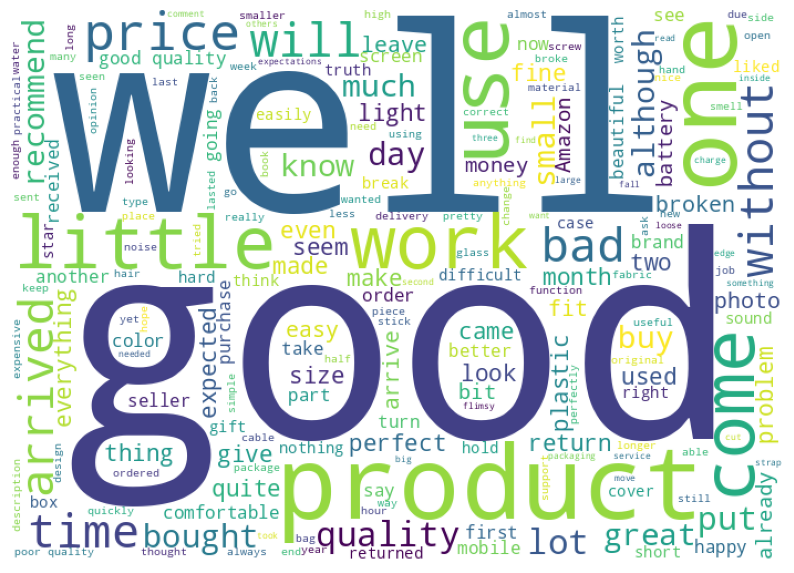

In [65]:
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ')
  text = ' '.join([word for word in df_.split()])
  wordcloud = WordCloud(width=700,height=500,background_color='white').generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

wordcloud(df,'translated_lang')

### here in word cloud "good" and "well" is most frequent word

### Keyphrase Extractions

#### 1) YAKE

In [66]:
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keyword_list = []
  for kw in keywords:## kw = (keyword,score)
    keyword_list.append(kw[0])
  return keyword_list

keywords = df.translated_lang.apply(yake_extractor)

In [67]:
keywords

0      [good to entertain, entertain and relax, good,...
1      [lousy bicep isolator, bicep isolator, overrat...
2      [bit short, mesh is difficult, difficult to ha...
3      [packaged inside, arrived with signs, open alt...
4                  [repeated dice, play, repeated, dice]
                             ...                        
995    [worth making diagnoses, read half, making dia...
996    [Flies, chance, repellent, smell, totally, sep...
997    [brands that absorb, brands, absorb, sweat, sp...
998                                [accomplished, worth]
999    [Good bottle, hot and cold, Good, bottle, big,...
Name: translated_lang, Length: 1000, dtype: object

In [68]:
all_keywords = []
for kw in keywords:
  all_keywords.extend(kw)
cnt_yake = Counter(all_keywords).most_common(1000)
cnt_yake

[('good', 149),
 ('quality', 118),
 ('product', 106),
 ('price', 73),
 ('arrived', 62),
 ('bad', 50),
 ('time', 48),
 ('lot', 46),
 ('bought', 44),
 ('expected', 42),
 ('work', 41),
 ('recommend', 40),
 ('small', 40),
 ('works', 39),
 ('put', 39),
 ('fine', 38),
 ('buy', 38),
 ('great', 35),
 ('perfect', 34),
 ('Good', 34),
 ('day', 34),
 ('return', 31),
 ('plastic', 29),
 ('money', 29),
 ('broken', 28),
 ('size', 27),
 ('days', 27),
 ('perfectly', 26),
 ('made', 26),
 ('problem', 25),
 ('Amazon', 25),
 ('light', 25),
 ('months', 24),
 ('long', 24),
 ('give', 24),
 ('easy', 23),
 ('happy', 23),
 ('comfortable', 23),
 ('good quality', 23),
 ('battery', 23),
 ('delivery', 23),
 ('received', 23),
 ('truth', 22),
 ('beautiful', 22),
 ('arrive', 21),
 ('purchase', 21),
 ('pretty', 21),
 ('photo', 21),
 ('screen', 21),
 ('thing', 21),
 ('bit', 20),
 ('order', 20),
 ('mobile', 20),
 ('job', 20),
 ('worth', 20),
 ('broke', 19),
 ('difficult', 18),
 ('lasted', 18),
 ('month', 18),
 ('easily', 1

#### 2) RAKE

In [69]:
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()
rake_keywords = df.translated_lang.apply(rake_extractor)

In [70]:
rake_keywords

0                       [relax, little, good, entertain]
1      [lousy bicep isolator, overrated brand, lousy,...
2      [upper part, bit short, otherwise, mesh, hang,...
3      [open although apparently well packaged inside...
4                         [two repeated dice came, play]
                             ...                        
995    [worth making diagnoses, read half, read half,...
996    [totally separates, repellent smell, even come...
997    [sweat much better spend, good ones, little, b...
998                                [worth, accomplished]
999    [good bottle, well, temperature, keeps, hot, d...
Name: translated_lang, Length: 1000, dtype: object

In [71]:
all_keywords = []
for kw in rake_keywords:
  all_keywords.extend(kw)
cnt_rake = Counter(all_keywords).most_common(1000)
cnt_rake

[('product', 86),
 ('good', 76),
 ('well', 63),
 ('use', 62),
 ('price', 60),
 ('lot', 56),
 ('like', 52),
 ('bought', 49),
 ('put', 49),
 ('know', 47),
 ('recommend', 44),
 ('one', 42),
 ('although', 42),
 ('quality', 39),
 ('time', 38),
 ('arrived', 38),
 ('buy', 38),
 ('expected', 38),
 ('would', 37),
 ('bad', 36),
 ('return', 36),
 ('work', 35),
 ('fine', 30),
 ('give', 30),
 ('perfect', 29),
 ('...', 29),
 ('easy', 28),
 ('good quality', 28),
 ('made', 28),
 ('problem', 27),
 ('comfortable', 27),
 ('see', 27),
 ('happy', 26),
 ('truth', 26),
 ('used', 26),
 ('comes', 26),
 ('also', 24),
 ('small', 24),
 ('beautiful', 24),
 ('returned', 23),
 ('purchase', 23),
 ('photo', 23),
 ('going', 23),
 ('little', 22),
 ('difficult', 22),
 ('light', 22),
 ('battery', 22),
 ('received', 22),
 ('come', 21),
 ('plastic', 21),
 ('arrive', 21),
 ('think', 21),
 ('poor quality', 21),
 ('money', 21),
 ('even', 20),
 ('able', 20),
 ('mobile', 20),
 ('worth', 20),
 ('case', 19),
 ('amazon', 19),
 ('ge

#### using keyphrase extraction we get the important keyphrases which are positive

# **4) Data Preprocessing**

In [72]:
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

## We create a target column on the basis of star rating

In [73]:
def target_column(data):
    if (data==1) or (data==2):
        return 0                # negative
    elif (data==3):
        return 1                 # Neutral
    elif (data==4) or (data==5):
        return 2                  # positive
df['target'] = df.stars.apply(target_column)

In [74]:
df.head()

,review_body,stars,language,translated_lang,target
0,Está muy bien para entretener y relajarse un poco,4,es,It is very good to entertain and relax a little,2
1,"Es un aislador de bíceps malísimo, no ajusta l...",1,es,"It's a lousy bicep isolator, it doesn't adjust...",0
2,Es un poco bajita y la malla es difícil de col...,4,es,It is a bit short and the mesh is difficult to...,2
3,Llegó con signos de estar abierto aunque apare...,2,es,It arrived with signs of being open although a...,0
4,Venían dos dados repetidos así no se puede jugar,1,es,Two repeated dice came so you can't play,0


In [77]:
x_train,x_test,y_train,y_test = train_test_split(df.translated_lang,df.target,test_size=0.25,random_state=42)

In [78]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(250,)
(750,)
(250,)
(750,)


In [79]:
clean_text_train = x_train.apply(remove_spaces)
clean_text_test = x_test.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)
clean_text_test = clean_text_test.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)
clean_text_test = clean_text_test.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)
clean_text_test = clean_text_test.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)
clean_text_test = clean_text_test.apply(lemmatization)

In [80]:
clean_text_train

82     not arrived scheduled date today ordered month...
991                              simple pull step enough
789    worst ever lot come without touching bottle st...
894        smell like cheap plastic not comfortable ugly
398    clip fine instead clip requested sent clip tru...
                             ...                        
106    beautiful varied good finish fine great price ...
270    frame replace car stereo ford focus truth fit ...
860    bought support able place mobile different pos...
435               pleasant smell highly recommended scar
102                                 stick well hold well
Name: translated_lang, Length: 750, dtype: object

In [81]:
clean_text_test

521    happy purchase package intact perfectly packed...
737    fabric fulfill mission protect chair leave sui...
740             arrived broken first time sent back cost
660    poor quality not stand straight joint not well...
411             peel not enough glue fall one glass came
                             ...                        
109    get lost thing child delighted book looking da...
430    dinosaur well done year old granddaughter ever...
77     entry good product well packaged upper part bo...
84                                   seems weak job well
286                    reinforce tab case not see result
Name: translated_lang, Length: 250, dtype: object

## **5) Feature Engineering and Model Training**

In [94]:
tfidf = TfidfVectorizer(max_df = 0.95,max_features=1000)
tfidf_train = tfidf.fit_transform(clean_text_train)
tfidf_test = tfidf.transform(clean_text_test)

In [95]:
tfidf_mnb = MultinomialNB()
tfidf_mnb.fit(tfidf_train.A,y_train)
predict_tfidf = tfidf_mnb.predict(tfidf_test.A)
accuracy_tfidf = accuracy_score(y_test,predict_tfidf)*100
accuracy_tfidf

64.0

In [96]:
count = CountVectorizer(max_df=0.95,max_features=1000)
count_val_train = count.fit_transform(clean_text_train)
count_val_test = count.transform(clean_text_test)

In [97]:
count_mnb = MultinomialNB()
count_mnb.fit(count_val_train.A,y_train)
predict_count = count_mnb.predict(count_val_test.A)
accuracy_count = accuracy_score(y_test,predict_count)*100
accuracy_count

62.4

In [98]:
import pickle

In [99]:
pickle.dump(tfidf, open('tfidf1.pkl', "wb"))

In [100]:
pickle.dump(tfidf_mnb, open('model2.pkl', "wb"))